In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
df = pd.read_csv('books.csv')

## Understanding the dataset

In [3]:
# Verifying types of data in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  float64
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [4]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [5]:
df1 = df.loc[df['ratings_count'] < 10000]
# # plt.figure(figsize=(20,5))
# # plt.boxplot(df1['ratings_count'], vert=False)
# # plt.show()
# df1

In [6]:
#Ordering by Ratings_Counts
df.sort_values(by='ratings_count', ascending=False) 

#Removing columns that are not relevante
df.drop(columns=['isbn', 'isbn13'], inplace=True) 

#Removing all the books that have not been voted at all
df = df.loc[df['ratings_count'] > 0] 
df.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,16967,1632,Eric Flint,4.04,eng,597,8406,638,6/15/2006,Baen Books
1,1067,1776,David McCullough,4.07,eng,386,166916,6243,7/4/2006,Simon Schuster
2,1068,1776,Peter Stone/Sherman Edwards,4.22,eng,192,1299,30,11/18/1976,Penguin Books
3,5477,1984,George Orwell/Erich Fromm,4.18,eng,268,1322,121,7/1/1981,Signet Classics
4,19100,1984,George Orwell/Mauricio Molina/Miguel Martínez ...,4.18,spa,301,451,42,8/1/2002,Lectorum


# Checking the outliers on each numeric category

In [7]:
df['ratings_count'].describe()

count    1.104300e+04
mean     1.807283e+04
std      1.128955e+05
min      1.000000e+00
25%      1.100000e+02
50%      7.660000e+02
75%      5.061500e+03
max      4.597666e+06
Name: ratings_count, dtype: float64

## Outliers Removal with IQR (did not work properly)

In [8]:
Q1 = df['ratings_count'].quantile(0.25)
Q3 = df['ratings_count'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1 {Q1} - Q3 {Q3} - IQR {IQR}')

Q1 110.0 - Q3 5061.5 - IQR 4951.5


In [9]:
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
lower_limit, upper_limit

(-7317.25, 12488.75)

In [10]:
outlier_iqr = df.loc[(df['ratings_count'] < lower_limit)|(df['ratings_count'] > upper_limit)]
outlier_iqr

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1,1067,1776,David McCullough,4.07,eng,386,166916,6243,7/4/2006,Simon Schuster
8,11525,1 000 Places to See Before You Die,Patricia Schultz,3.85,eng,992,36303,439,5/22/2003,Workman Publishing Company
11,11339,100 Love Sonnets,Pablo Neruda/Stephen Tapscott,4.39,eng,232,12613,392,1/1/1986,University of Texas Press
18,17020,13 Little Blue Envelopes (Little Blue Envelope...,Maureen Johnson,3.64,eng,322,70689,4067,12/21/2010,HarperCollins Publishers
21,39020,1491: New Revelations of the Americas Before C...,Charles C. Mann,4.02,eng,541,56290,3238,10/10/2006,Vintage
...,...,...,...,...,...,...,...,...,...,...
11076,33453,You Suck (A Love Story #2),Christopher Moore,3.83,eng,328,42028,2416,1/16/2007,William Morrow
11095,22193,You're the One That I Want (Gossip Girl #6),Cecily von Ziegesar,3.71,eng,224,17875,204,10/6/2004,Little Brown Young Readers
11101,13134,You've Been Warned,James Patterson/Howard Roughan,3.53,eng,374,18058,1519,9/10/2007,Little Brown and Company
11108,629,Zen and the Art of Motorcycle Maintenance: An ...,Robert M. Pirsig,3.77,eng,540,166046,6446,4/25/2006,HarperTorch


In [11]:
df_no_outlier = df.loc[(df['ratings_count'] > lower_limit ) & (df['ratings_count'] < upper_limit)].sort_values(by='ratings_count', ascending=False)
df_no_outlier

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
5604,29393,Our Band Could Be Your Life: Scenes from the A...,Michael Azerrad,4.18,eng,522,12472,573,7/2/2002,Back Bay Books
6534,23226,She Went All the Way,Meg Cabot,3.70,eng,357,12470,441,12/3/2002,Avon
2014,13623,Death Note Vol. 10: Deletion (Death Note #10),Tsugumi Ohba/Takeshi Obata/Tetsuichiro Miyaki,4.22,eng,188,12461,325,3/6/2007,VIZ Media LLC
9815,27208,The Third Policeman,Flann O'Brien/Denis Donoghue,4.01,eng,200,12452,1179,3/1/1999,Dalkey Archive Press
2732,24476,Fargo Rock City: A Heavy Metal Odyssey in Rura...,Chuck Klosterman,3.80,eng,288,12448,526,5/1/2002,Scribner
...,...,...,...,...,...,...,...,...,...,...
10093,33581,The Work of Work Servitude Slavery and Labor ...,Allen J. Frantzen/Ruth Mazo Karras/Madonna J. ...,3.00,eng,240,1,0,8/14/1994,Cruithne Press
2138,17513,Die Verschwundene Katze = The Missing Cat,Chris L. Demarest,4.14,ger,64,1,0,1/1/1996,Berlitz Kids
2159,21934,Dirty White Boys,Stephen Hunter/Will Patten,4.05,eng,0,1,1,5/1/2006,Hachette Audio
7476,45392,The Brave Women of the Gulf Wars: Operation De...,Karen Zeinert/Mary Miller,4.00,eng,112,1,0,9/1/2005,Twenty-First Century Books (CT)


## Outliers Removal with Z-Score (did not work properly)

In [12]:
outlier_z = []
mean = np.mean(df['ratings_count'])
std = np.std(df['ratings_count'])
mean, std
treshold = 3

for i in df['ratings_count']:
    z_score = (i - mean) / std
    if np.abs(z_score) > treshold:
        outlier_z.append(i)

       
df_z = df.loc[~df['ratings_count'].isin(outlier_z)]
df_z

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,16967,1632,Eric Flint,4.04,eng,597,8406,638,6/15/2006,Baen Books
1,1067,1776,David McCullough,4.07,eng,386,166916,6243,7/4/2006,Simon Schuster
2,1068,1776,Peter Stone/Sherman Edwards,4.22,eng,192,1299,30,11/18/1976,Penguin Books
3,5477,1984,George Orwell/Erich Fromm,4.18,eng,268,1322,121,7/1/1981,Signet Classics
4,19100,1984,George Orwell/Mauricio Molina/Miguel Martínez ...,4.18,spa,301,451,42,8/1/2002,Lectorum
...,...,...,...,...,...,...,...,...,...,...
11118,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.00,eng,128,2,0,3/6/2003,BradyGames
11119,38069,Zora Neale Hurston: A Literary Biography,Robert E. Hemenway/Alice Walker,4.10,eng,408,103,9,9/1/1980,University of Illinois Press
11120,38070,Zora Neale Hurston: Critical Perspectives Past...,Henry Louis Gates Jr./Kwame Anthony Appiah,4.20,eng,238,24,0,2/11/2000,Harper Paperbacks
11121,24796,Zorro,Isabel Allende/Margaret Sayers Peden/محمدعلی م...,3.76,eng,677,16324,1145,5/3/2005,HarperLargePrint


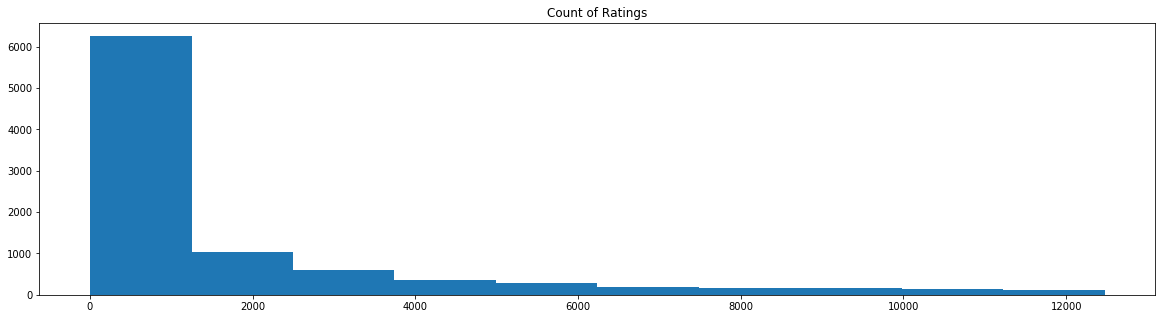

In [13]:
# Graphic without IRQ outliers
plt.figure(figsize=(20,5))
plt.hist(df_no_outlier['ratings_count'])
plt.title('Count of Ratings')
plt.show()

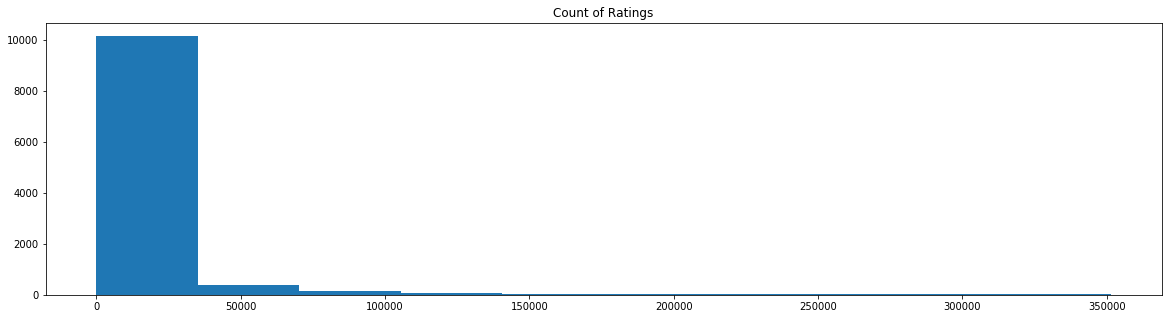

In [14]:
# Graphic without Z_Score outliers
plt.figure(figsize=(20,5))
plt.hist(df_z['ratings_count'])
plt.title('Count of Ratings')
plt.show()

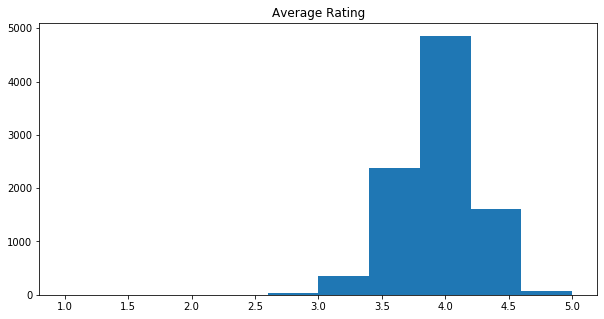

In [15]:
plt.figure(figsize=(10,5))
plt.hist(df_no_outlier['average_rating'])
plt.title('Average Rating')
plt.show()

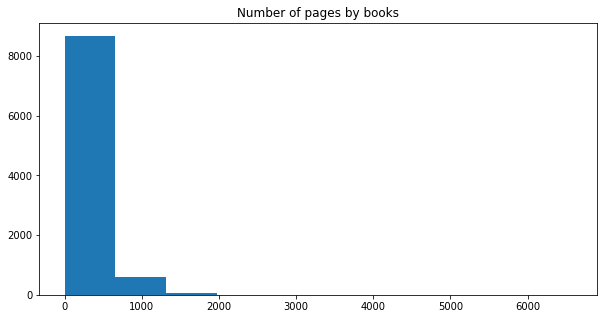

In [16]:
plt.figure(figsize=(10,5))
plt.hist(df_no_outlier['num_pages'])
plt.title('Number of pages by books')
plt.show()

# TOP 10 Books with best average

In [17]:
# Top 10 Books with best average rating
df.iloc[0:10]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,16967,1632,Eric Flint,4.04,eng,597,8406,638,6/15/2006,Baen Books
1,1067,1776,David McCullough,4.07,eng,386,166916,6243,7/4/2006,Simon Schuster
2,1068,1776,Peter Stone/Sherman Edwards,4.22,eng,192,1299,30,11/18/1976,Penguin Books
3,5477,1984,George Orwell/Erich Fromm,4.18,eng,268,1322,121,7/1/1981,Signet Classics
4,19100,1984,George Orwell/Mauricio Molina/Miguel Martínez ...,4.18,spa,301,451,42,8/1/2002,Lectorum
5,38338,11-Sep,Noam Chomsky/Greg Ruggiero/Marili Margomenou/M...,3.73,eng,140,3070,172,12/4/2001,Seven Stories Press
6,6549,said the shotgun to the head.,Saul Williams,4.22,en-US,192,2762,214,9/1/2003,MTV Books
7,14490,$30 Film School: How to Write Direct Produce...,Michael W. Dean,3.49,eng,528,30,4,5/13/2003,Cengage Learning
8,11525,1 000 Places to See Before You Die,Patricia Schultz,3.85,eng,992,36303,439,5/22/2003,Workman Publishing Company
9,8542,10 lb Penalty,Dick Francis,3.90,eng,320,3490,177,8/3/2004,G.P. Putnam's Sons


In [18]:
# Top 10 Most voted books
most_reviewed = df.sort_values(by='ratings_count',ascending=False).iloc[0:10]
most_reviewed

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10468,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,9/6/2006,Little Brown and Company
8450,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7578,5107,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1/30/2001,Back Bay Books
684,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,21303,4/1/2006,Pocket Books
3339,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
3333,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
3337,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
8163,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
699,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,eng,122,2111750,29677,5/6/2003,NAL
3335,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


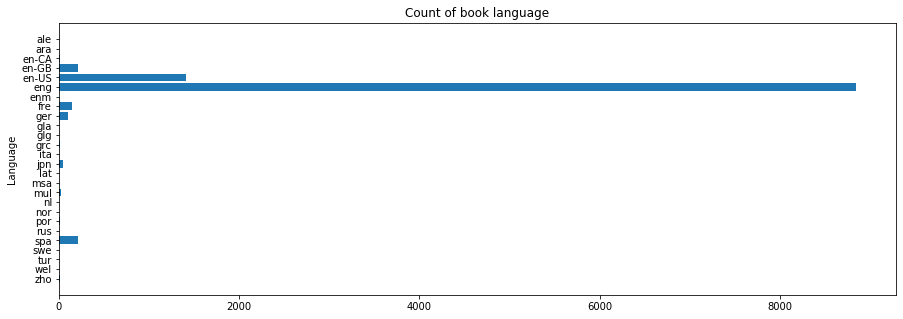

In [19]:
# Books by language
language = df.groupby(['language_code'])['language_code'].count()
plt.figure(figsize = (15,5))
plt.barh(width = language.values, y = language.index)
plt.title('Count of book language')
plt.ylabel('Language')
plt.gca().invert_yaxis()

# Author with most books and best average

In [20]:
# Autor with best average

# Grouping by authors name to find the average
authors_avg = df.groupby(by='authors', sort=False)['average_rating'].mean().reset_index()
authors_avg.sort_values(by='average_rating',ascending=False)

# Grouping by authors name to find the number of books written
authors_count = df.groupby(by='authors')['average_rating'].count().reset_index()
authors_count.sort_values(by='average_rating', ascending=False)

# Converting Series to DataFrame
authors_count = authors_count.merge(authors_avg, on = 'authors' )
authors_count

,authors,average_rating_x,average_rating_y
0,A.B. Yehoshua/Hillel Halkin,2,3.600
1,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,1,3.760
2,A.E. Cunningham/Harlan Ellison/Charles F. Mill...,1,4.150
3,A.J. Jacobs,1,3.760
4,A.M. Homes,1,3.280
...,...,...,...
6571,Émile Zola/Henri Mitterand,1,4.060
6572,Émile Zola/Robert Lethbridge/Elinor Dorday,1,4.010
6573,Émile Zola/Robin Buss/Brian Nelson,1,3.990
6574,Émile Zola/Roger Pearson,2,4.045


In [21]:
authors_count = authors_count.rename(columns={'average_rating_x':'count', 'average_rating_y':'mean'})
authors_count.sort_values(by='count',ascending=False,inplace=True)
authors_most_books = authors_count.head(10)
authors_most_books

,authors,count,mean
5727,Stephen King,40,3.973500
4693,P.G. Wodehouse,40,4.147250
5412,Rumiko Takahashi,38,4.190000
4657,Orson Scott Card,35,3.779143
45,Agatha Christie,33,3.989091
4932,Piers Anthony,30,3.716667
5470,Sandra Brown,29,3.742069
4255,Mercedes Lackey,29,4.039310
1384,Dick Francis,28,3.962143
2592,J.K. Rowling,24,4.521250


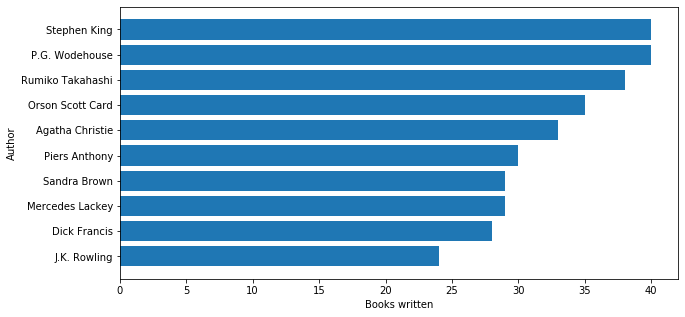

In [22]:
plt.figure(figsize=(10,5))
plt.barh(authors_most_books['authors'], authors_most_books['count'])
plt.ylabel('Author')
plt.xlabel('Books written')
plt.gca().invert_yaxis()

In [30]:
def authors_avg(quantity_of_books):
    authors_best_avg = authors_count[authors_count['count'] > quantity_of_books].sort_values(by='mean', ascending=False)
    authors_best_avg.head(20)
    return authors_best_avg

In [32]:
# Change the number to filter authors based on quantity of books published
authors_avg(30)

,authors,count,mean
5412,Rumiko Takahashi,38,4.190000
4693,P.G. Wodehouse,40,4.147250
45,Agatha Christie,33,3.989091
5727,Stephen King,40,3.973500
4657,Orson Scott Card,35,3.779143


# Checking if there is any correlation between columns

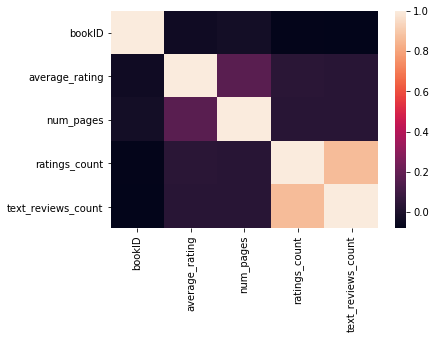

In [45]:
sns.heatmap(df.corr())

## Books with more ratings receive more reviews?

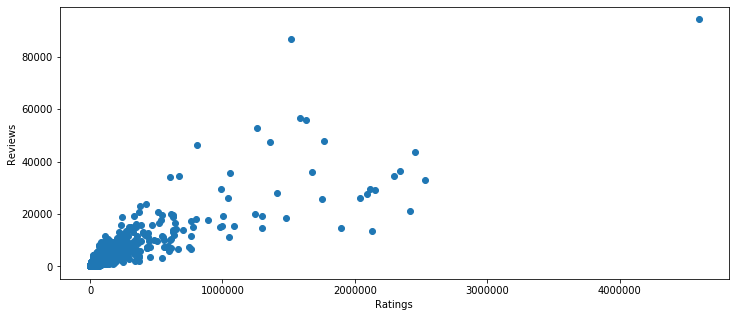

In [54]:
plt.figure(figsize=(12,5))
plt.scatter(x = df['ratings_count'],y= df['text_reviews_count'])
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.show()

In [ ]:
Seems like books with more ratings have a higher change of having their texts reviewed

## Books with less pages receive more votes?

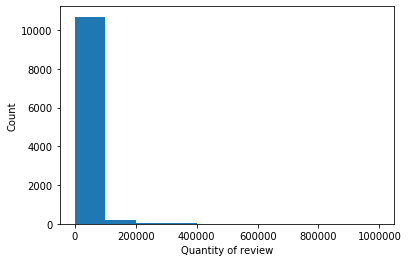

In [25]:
df_3= df.loc[df['ratings_count'] < 1000000]
plt.figure()
plt.hist(x = df_3['ratings_count'])
plt.xlabel('Quantity of review')
plt.ylabel('Count')
plt.show()

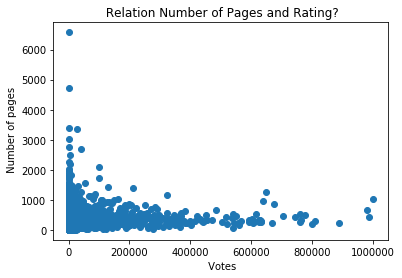

In [39]:
plt.figure()
plt.scatter(x = df_3['ratings_count'], y = df_3['num_pages'])
plt.title(' Relation Number of Pages and Rating?')
plt.xlabel(' Votes')
plt.ylabel(' Number of pages')
plt.show()

In [35]:
df_3

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,16967,1632,Eric Flint,4.04,eng,597,8406,638,6/15/2006,Baen Books
1,1067,1776,David McCullough,4.07,eng,386,166916,6243,7/4/2006,Simon Schuster
2,1068,1776,Peter Stone/Sherman Edwards,4.22,eng,192,1299,30,11/18/1976,Penguin Books
3,5477,1984,George Orwell/Erich Fromm,4.18,eng,268,1322,121,7/1/1981,Signet Classics
4,19100,1984,George Orwell/Mauricio Molina/Miguel Martínez ...,4.18,spa,301,451,42,8/1/2002,Lectorum
...,...,...,...,...,...,...,...,...,...,...
11118,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.00,eng,128,2,0,3/6/2003,BradyGames
11119,38069,Zora Neale Hurston: A Literary Biography,Robert E. Hemenway/Alice Walker,4.10,eng,408,103,9,9/1/1980,University of Illinois Press
11120,38070,Zora Neale Hurston: Critical Perspectives Past...,Henry Louis Gates Jr./Kwame Anthony Appiah,4.20,eng,238,24,0,2/11/2000,Harper Paperbacks
11121,24796,Zorro,Isabel Allende/Margaret Sayers Peden/محمدعلی م...,3.76,eng,677,16324,1145,5/3/2005,HarperLargePrint


In [26]:
# Best book of each year
# Author with most books publicized